In [1]:
import pandas as pd
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
a114 = pd.read_csv("A114.csv", delimiter=";")

In [3]:
a114['Datum'] = pd.to_datetime(a114['Datum'], format='%y%m%d')

In [4]:
a114.head()

,TKNR,Zst,Land,Strklas,Strnum,Datum,Wotag,Fahrtzw,Stunde,KFZ_R1,...,Bus_R2,K_Bus_R2,LoA_R2,K_LoA_R2,Lzg_R2,K_Lzg_R2,Sat_R2,K_Sat_R2,Son_R2,K_Son_R2
0,3346,2011,11,A,114,2015-01-01,4,s,1,92,...,0,-,0,-,0,-,0,-,0,-
1,3346,2011,11,A,114,2015-01-01,4,s,2,309,...,0,-,0,-,0,-,0,-,1,-
2,3346,2011,11,A,114,2015-01-01,4,s,3,232,...,0,-,1,-,0,-,0,-,1,-
3,3346,2011,11,A,114,2015-01-01,4,s,4,154,...,0,-,2,-,0,-,0,-,0,-
4,3346,2011,11,A,114,2015-01-01,4,s,5,93,...,0,-,0,-,1,-,1,-,0,-


In [5]:
a114.shape

(8760, 57)

In [6]:
def plot_by_weekday(df, Fahrtzw=None):
    if Fahrtzw is not None:
        filtered = df[df.Fahrtzw == Fahrtzw]
    else:
        filtered = df
    grouped = filtered.groupby(['Wotag', 'Stunde'], as_index=False)[ 'KFZ_R1', 'KFZ_R2'].mean()
    melted = pd.melt(grouped, id_vars=['Wotag', 'Stunde'], var_name='Richtung')
    grid = sns.FacetGrid(melted, col="Wotag", hue="Richtung", col_wrap=3, size=5)
    grid.map(sns.pointplot, "Stunde", "value") .add_legend()


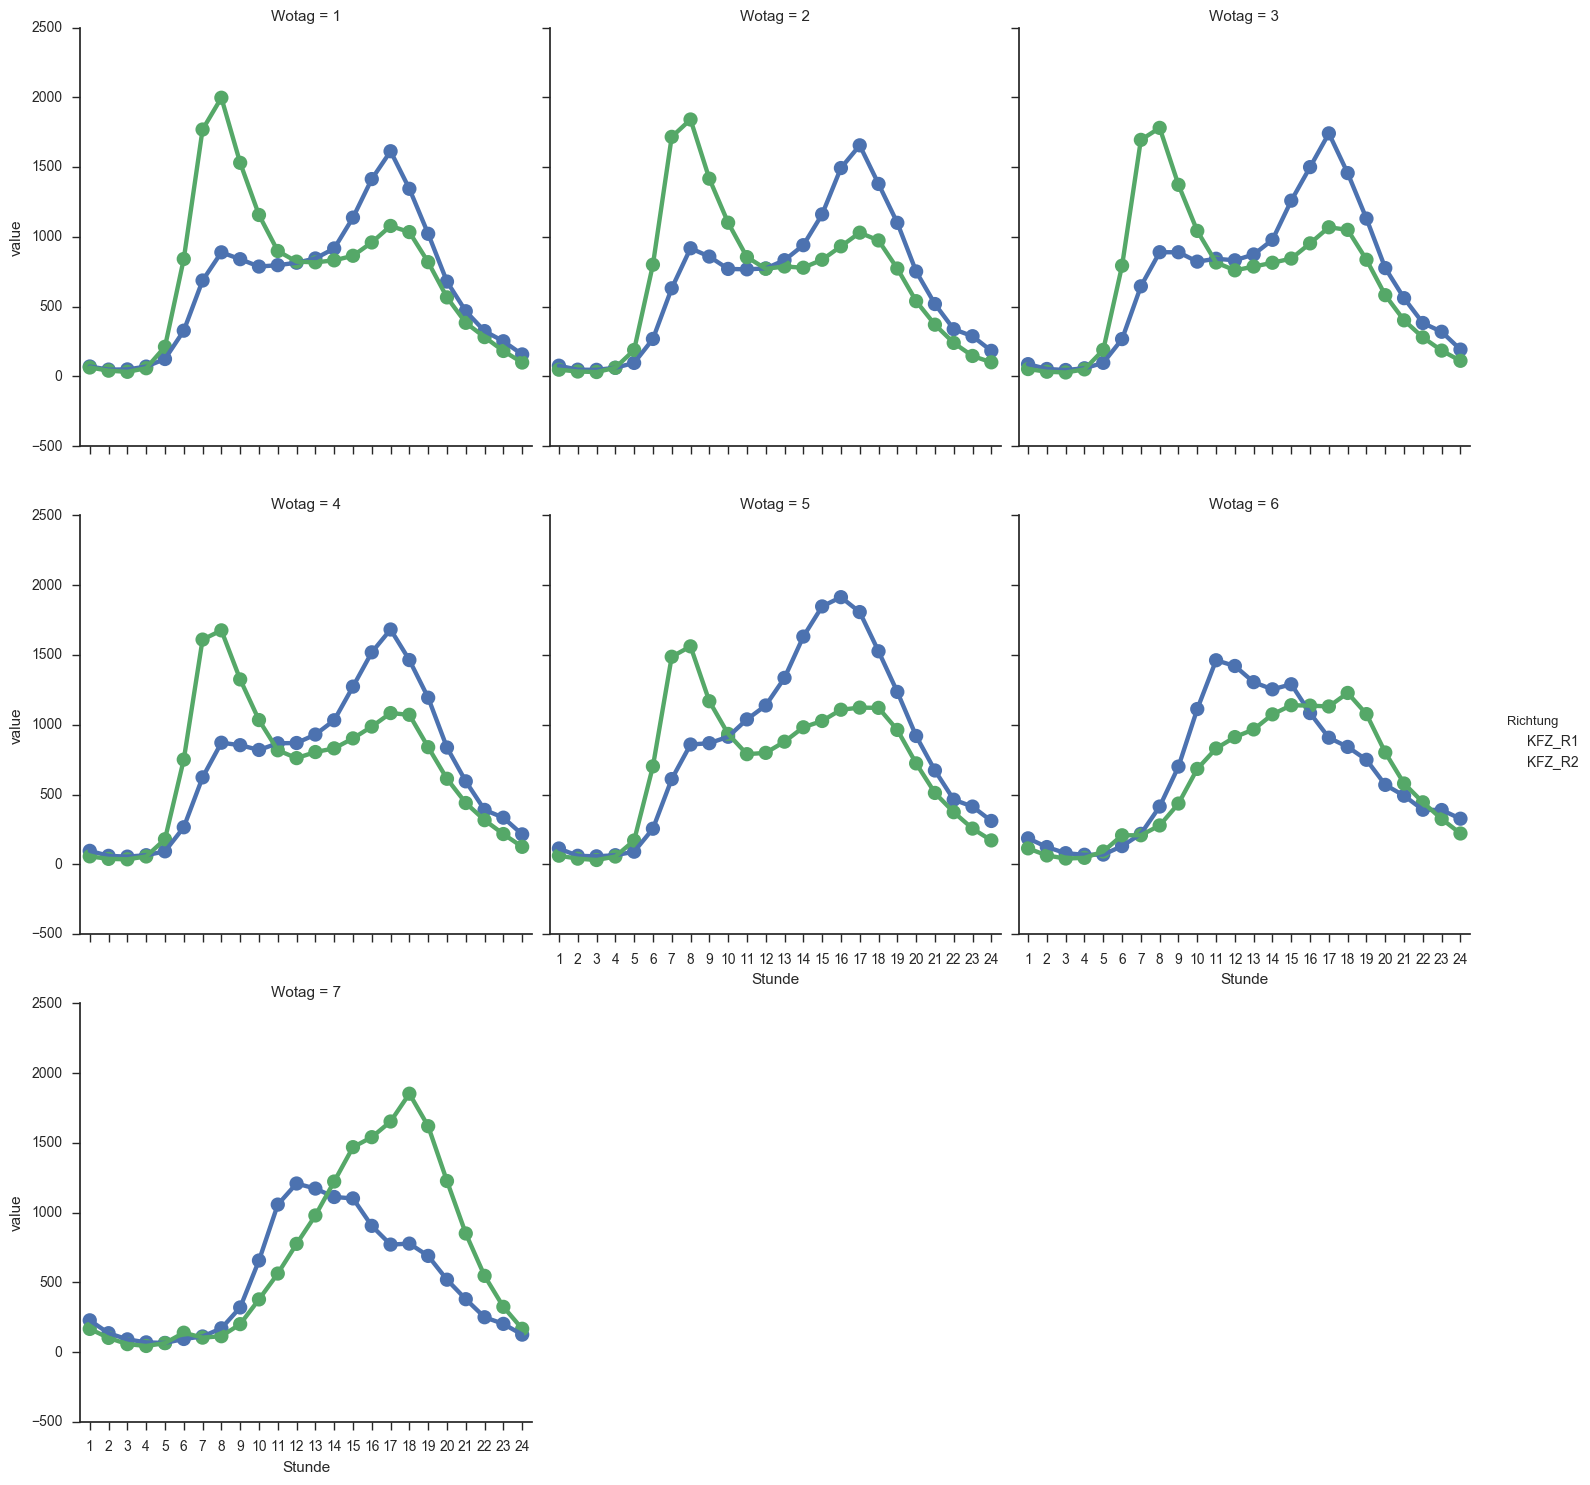

In [7]:
plot_by_weekday(a114)

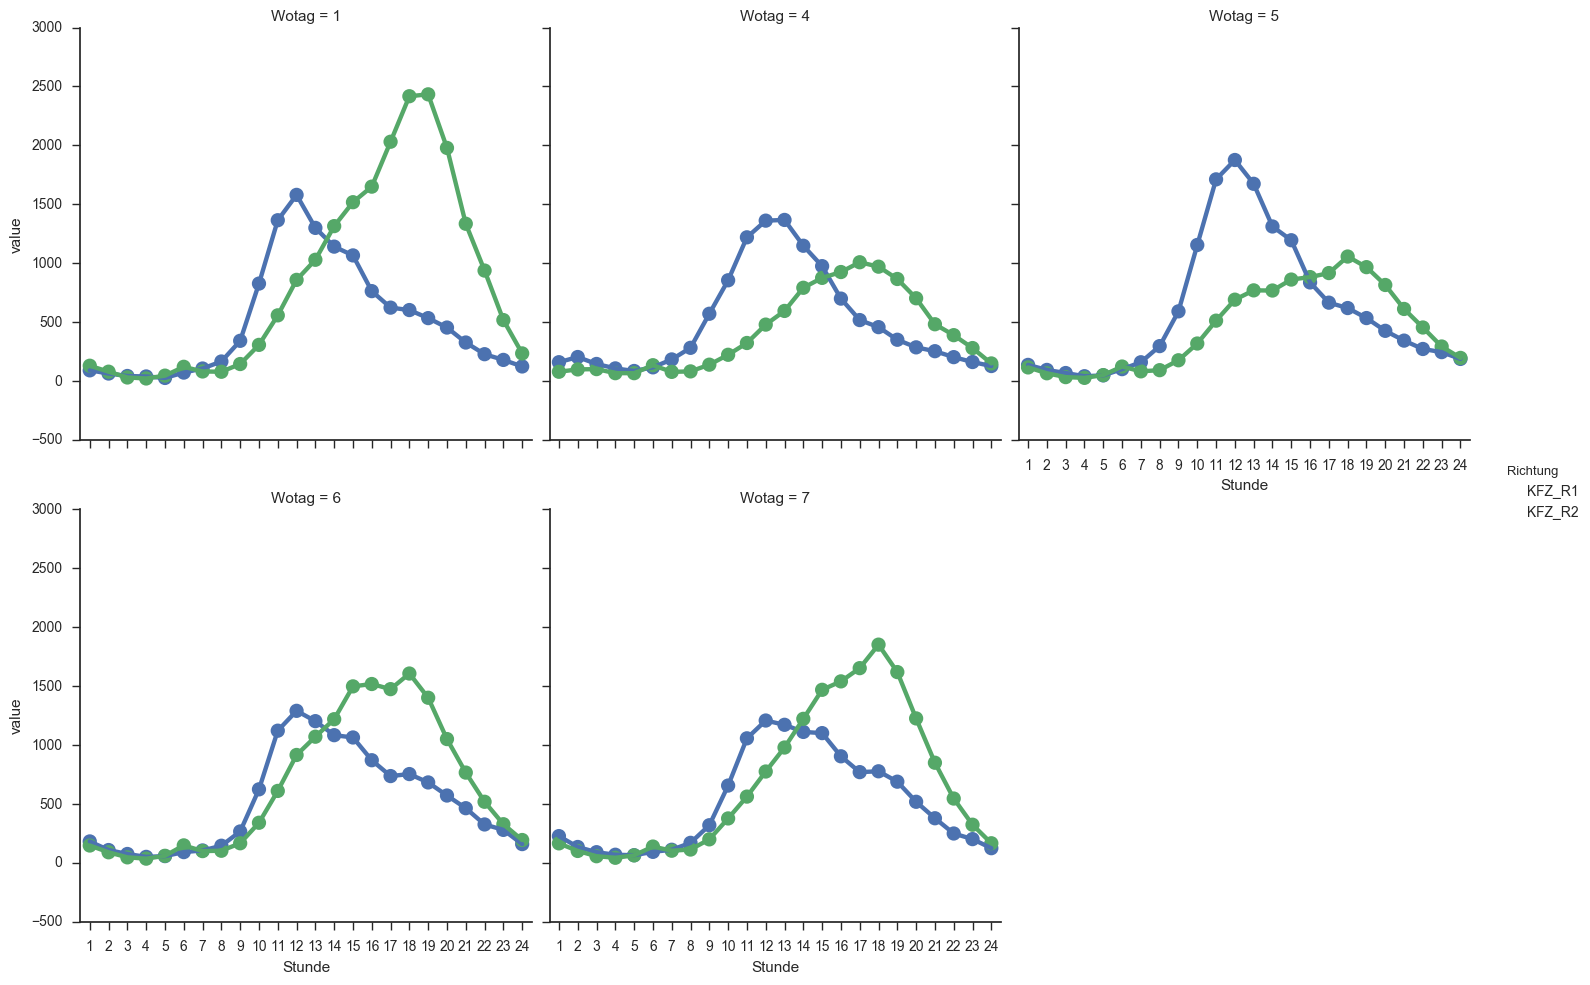

In [8]:
plot_by_weekday(a114, Fahrtzw='s')

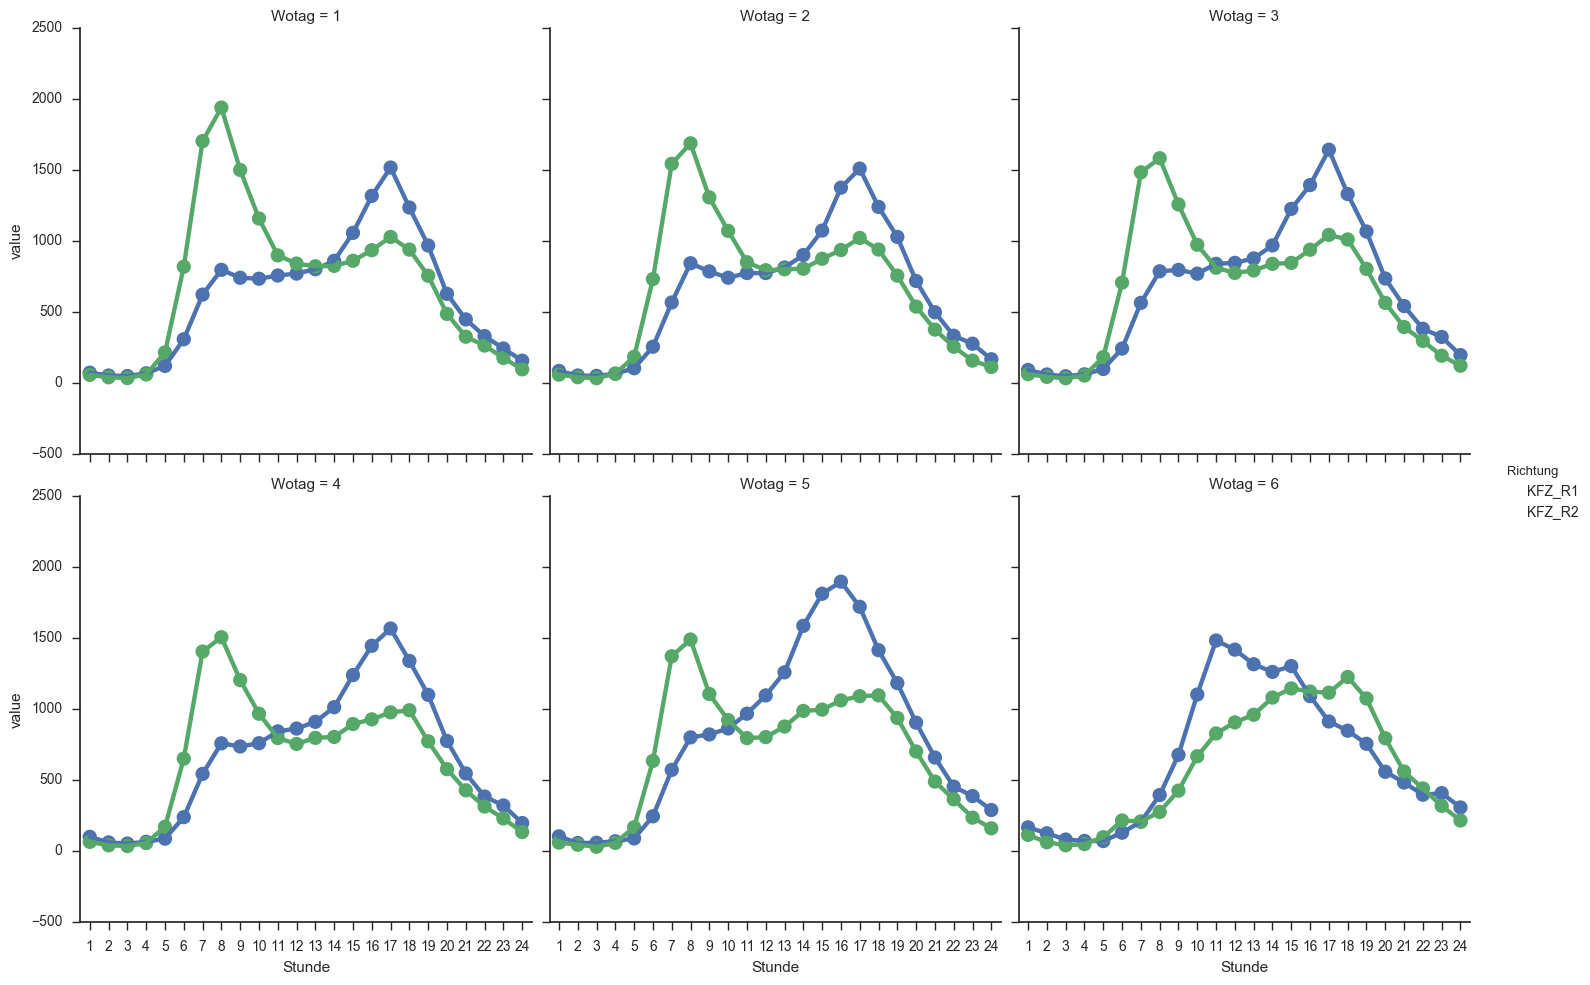

In [9]:
plot_by_weekday(a114, Fahrtzw='u')

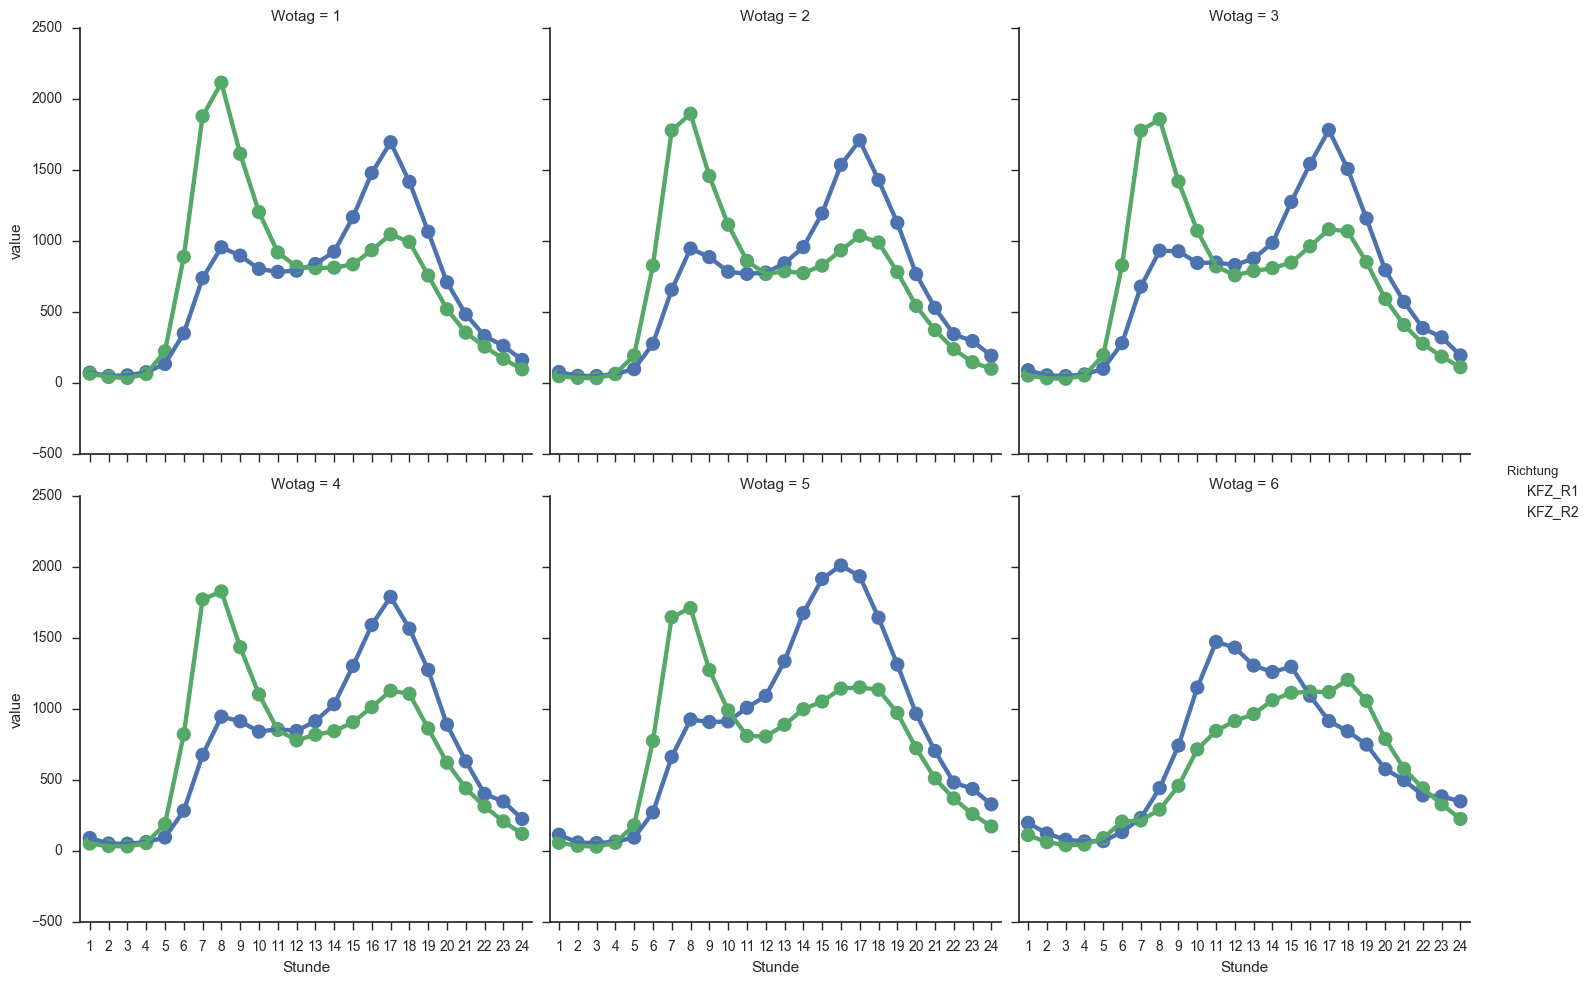

In [10]:
plot_by_weekday(a114, Fahrtzw='w')